# Looking at Gene Expression Data
## A Fascinating discussion by Jonathan Dursi

## Data From Biobase 

We'll load some new data:

In [1]:
dataDirectory <- system.file("extdata", package="Biobase")
exprsFile <- file.path(dataDirectory, "exprsData.txt")
exprs <- read.table(exprsFile, header=TRUE, sep="\t")

In [2]:
pDataFile = file.path(dataDirectory, "pData.txt")
pData = read.table(pDataFile, header=TRUE, sep="\t")

In [3]:
head(pData)

,id,gender,type,score
1,A,Female,Control,0.75
2,B,Male,Case,0.4
3,C,Male,Control,0.73
4,D,Male,Case,0.42
5,E,Female,Case,0.93
6,F,Male,Control,0.22


## Correlations

What does the correlation between case A and E: a female control and case: look like?

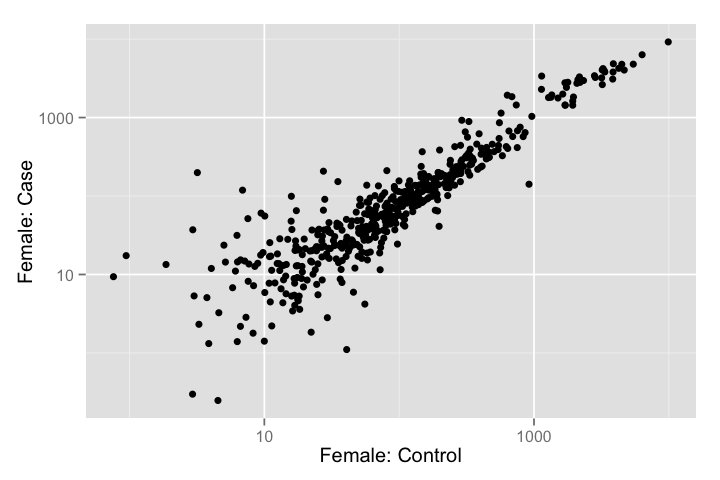

In [4]:
library(ggplot2)
options(repr.plot.height=4, repr.plot.width=6)
ggplot(exprs) + geom_point(aes(x=abs(A), y=abs(E))) + xlab('Female: Control') + ylab('Female: Case') +
   scale_x_log10() + scale_y_log10()

Of course, it's very important to look at residuals:

In [5]:
fit.AE <- lm(E~A, data=exprs)
df.AE <- data.frame(A=exprs$A, E=exprs$B, residuals=fit.AE$residuals)

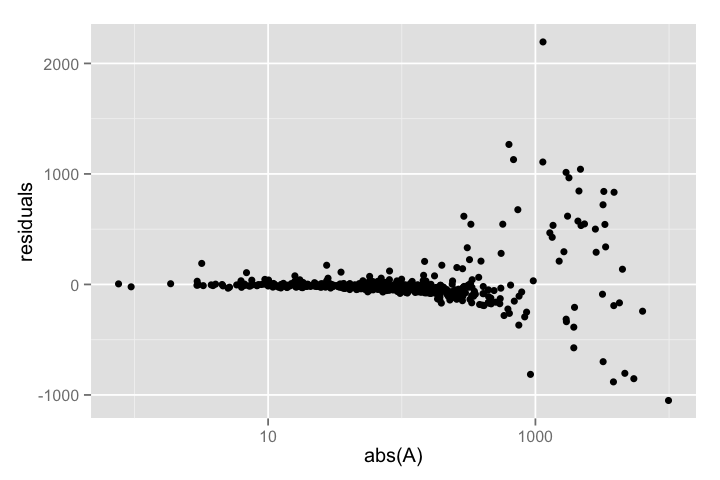

In [6]:
ggplot(df.AE) + geom_point(aes(x=abs(A), y=residuals)) + scale_x_log10()

We see greatly increased dispersion at large expressions.  What do the relative residuals look like: $\frac{\mathtt{resid}}{A}$?

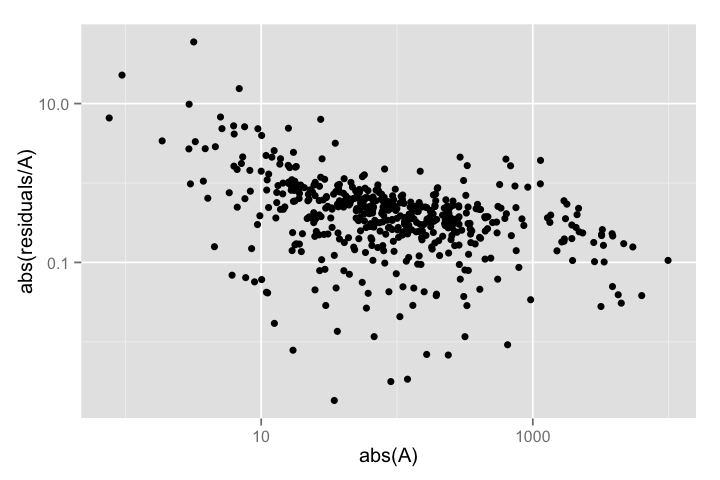

In [7]:
ggplot(df.AE) + geom_point(aes(x=abs(A), y=abs(residuals/A))) + scale_x_log10() + scale_y_log10()

In [8]:
summary(fit.AE)


Call:
lm(formula = E ~ A, data = exprs)

Residuals:
     Min       1Q   Median       3Q      Max 
-1050.18   -49.03   -22.75    -0.69  2194.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.14933   11.02953   0.467    0.641    
A            1.03437    0.01182  87.480   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.3 on 498 degrees of freedom
Multiple R-squared:  0.9389,	Adjusted R-squared:  0.9388 
F-statistic:  7653 on 1 and 498 DF,  p-value: < 2.2e-16


Note that the adjusted $R^2$ is 0.9388.  

## Comparing gene expression data between two individuals of different gender

Now let's compare a female and male controle case.  Are these two more or less correlated than a female control and a male case?

In [9]:
fit.AC <- lm(C ~ A, data=exprs)

In [10]:
summary(fit.AC)


Call:
lm(formula = C ~ A, data = exprs)

Residuals:
    Min      1Q  Median      3Q     Max 
-2006.8   -33.9   -19.4     8.3  6499.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.13115   16.20985   1.427    0.154    
A            0.90472    0.01738  52.063   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 338.5 on 498 degrees of freedom
Multiple R-squared:  0.8448,	Adjusted R-squared:  0.8445 
F-statistic:  2711 on 1 and 498 DF,  p-value: < 2.2e-16


The adjusted $R^2$ here is 0.8425, as opposed to the earlier 0.9388.  Can we see the same range of differences in the relative residuals, or is it worse?

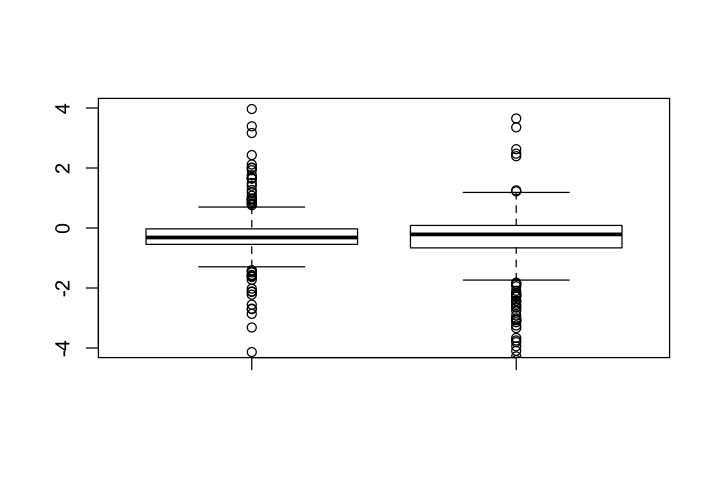

In [11]:
boxplot(fit.AE$residuals/fit.AE$model$A, fit.AC$residuals/fit.AC$model$A, ylim=c(-4,4))

In [12]:
summary(abs(fit.AE$residuals/fit.AE$model$A))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00183  0.22510  0.39290  0.81710  0.64300 59.73000 

In [13]:
summary(abs(fit.AC$residuals/fit.AC$model$A))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00055  0.14900  0.36660  0.88550  0.80510 38.75000 

## Conclusion

We see in this case that the variation across genders (control) was worse than that between a female control and case.  However, a more careful study would look across more of the 26 samples for better results.